In [7]:
import matplotlib.pyplot as plt
import numpy as np
from model_util_scannet_CIL_37 import ScannetDatasetConfig

In [8]:
def get_ratio(object_point_cloud):
    # scale object_point_cloud to [0, 1]
    object_point_cloud = object_point_cloud - np.min(object_point_cloud, axis=0)
    object_point_cloud = object_point_cloud / np.max(object_point_cloud, axis=0)
    # voxelize the object point cloud
    voxel_size = 0.05
    voxel_grid = np.zeros((int(1/voxel_size), int(1/voxel_size), int(1/voxel_size)))

    for point in object_point_cloud:
        voxel_x = min(int(point[0] / voxel_size), voxel_grid.shape[0] - 1) # 0 <= point[0] / voxel_size < 1
        voxel_y = min(int(point[1] / voxel_size), voxel_grid.shape[1] - 1) # 0 <= point[1] / voxel_size < 1
        voxel_z = min(int(point[2] / voxel_size), voxel_grid.shape[2] - 1) # 0 <= point[2] / voxel_size < 1
        voxel_grid[voxel_x, voxel_y, voxel_z] = 1

    # # visualize for debugging: does the voxelized object point cloud look correct?
    # fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    # ax.scatter(object_point_cloud[:,0], object_point_cloud[:,1], object_point_cloud[:,2])
    # plt.show()

    # use a list of triples to save the coordinates of the occupied voxels
    occupied_voxels = []
    for x in range(voxel_grid.shape[0]):
        for y in range(voxel_grid.shape[1]):
            for z in range(voxel_grid.shape[2]):
                if voxel_grid[x, y, z] == 1:
                    occupied_voxels.append((x, y, z))

    x_y_of_occ_voxels = [(x, y) for x, y, z in occupied_voxels]
    # remove duplicates from x_y_of_occ_voxels
    x_y_of_occ_voxels = list(set(x_y_of_occ_voxels))
    ratio_x_y = len(x_y_of_occ_voxels) / len(occupied_voxels) # actually this is the lower the better because it means some part of the object is occluded if it is high

    y_z_of_occ_voxels = [(y, z) for x, y, z in occupied_voxels]
    # remove duplicates from y_z_of_occ_voxels
    y_z_of_occ_voxels = list(set(y_z_of_occ_voxels))
    ratio_y_z = len(y_z_of_occ_voxels) / len(occupied_voxels) # actually this is the lower the better because it means some part of the object is occluded if it is high

    x_z_of_occ_voxels = [(x, z) for x, y, z in occupied_voxels]
    # remove duplicates from x_z_of_occ_voxels
    x_z_of_occ_voxels = list(set(x_z_of_occ_voxels))
    ratio_x_z = len(x_z_of_occ_voxels) / len(occupied_voxels) # actually this is the lower the better because it means some part of the object is occluded if it is high

    average_ratio = (ratio_x_y + ratio_y_z + ratio_x_z) / 3
    return average_ratio

In [13]:
# load object_reservoir from 'object_reservoir.pth'
with open('object_reservoir_with_ratio.pth', 'rb') as f:
    object_reservoir = np.load(f, allow_pickle=True)

# initialize config
config = ScannetDatasetConfig()

In [14]:
len(object_reservoir) # num objects 29579

num_objects = [6721, 2026, 1985, 1554, 1427, 1271, 1255, 928, 745, 661, 657, 551, 486, 481, 406, 390, 386, 364, 307, 300, 292, 279, 253, 251, 216, 201, 190, 186, 177, 170, 116, 113, 52, 39, 32, 22]
print(sum(num_objects)) # 29579 # 25490
print(len(num_objects)) # 36

25490
36


In [15]:
# for object in object_reservoir:
#     object['ratio'] = get_ratio(object['object_point_cloud'])
#     # print object['ratio'], limit to 4 decimal places
#     print('%.4f' % object['ratio'])

# # write object_reservoir to 'object_reservoir_with_ratio.pth'
# with open('object_reservoir_with_ratio.pth', 'wb') as f:
#     np.save(f, object_reservoir)

In [32]:
# select the sublist of object_reservoir that has object_class=6 (table)
table_reservoir = [object for object in object_reservoir if object['object_class'] == 6]

# sort table_reservoir by ratio from low to high
table_reservoir.sort(key=lambda x: x['ratio'])

print(len(table_reservoir)) # 1271


1271


dict_keys(['scene_name', 'object_id', 'object_class', 'object_point_cloud', 'ratio'])
6
table
0.2420


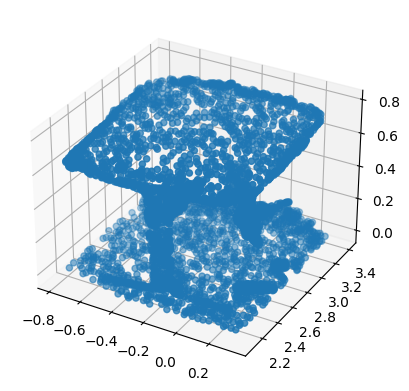

In [46]:
object_idx = 200

object_0 = table_reservoir[object_idx]
print(object_0.keys())
print(object_0['object_class'])
object_type = config.class2type[object_0['object_class']]
print(object_type)
# print ratio
print('%.4f' % object_0['ratio'])
# visualize object_0['object_point_cloud']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(object_0['object_point_cloud'][:,0], object_0['object_point_cloud'][:,1], object_0['object_point_cloud'][:,2])
plt.show()



dict_keys(['scene_name', 'object_id', 'object_class', 'object_point_cloud', 'ratio'])
6
table
0.4794


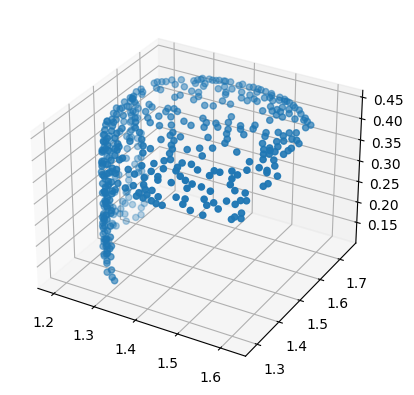

In [22]:
object_idx = 4

object_0 = object_reservoir[object_idx]
print(object_0.keys())
print(object_0['object_class'])
object_type = config.class2type[object_0['object_class']]
print(object_type)
# print ratio
print('%.4f' % object_0['ratio'])
# visualize object_0['object_point_cloud']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(object_0['object_point_cloud'][:,0], object_0['object_point_cloud'][:,1], object_0['object_point_cloud'][:,2])
plt.show()



(20, 20, 20)
0.3858185610010427
0.25547445255474455
0.37643378519290926
0.33924226624956555


In [38]:
# occupancy of the object
print(np.sum(voxel_grid) / np.prod(voxel_grid.shape)) # 0.0008

0.119875


In [39]:
print(np.sum(voxel_grid), np.prod(voxel_grid.shape)) # 0.0008

959.0 8000


In [12]:
# the objest_reservoir is a list of objects, each object is a dictionary with keys 'object_id', 'scene_name', 'object_class','object_point_cloud'
# loop through the list and count the occurrences of each object class
object_class_count = {}
for obj in object_reservoir:
    object_class = obj['object_class']
    if object_class in object_class_count:
        object_class_count[object_class] += 1
    else:
        object_class_count[object_class] = 1

# sort by key values
sorted_object_class_count = dict(sorted(object_class_count.items
(), key=lambda item: item[1], reverse=True))

print(sorted_object_class_count)

# print the number of keys in the dictionary
print(len(sorted_object_class_count)) # 37

{0: 6857, 1: 4357, 2: 2026, 3: 1985, 4: 1554, 5: 1427, 6: 1271, 7: 1031, 8: 928, 9: 745, 10: 661, 11: 657, 12: 551, 13: 486, 14: 481, 15: 406, 16: 390, 17: 386, 18: 364, 19: 307, 20: 300, 21: 292, 22: 279, 23: 253, 24: 251, 25: 216, 26: 201, 27: 190, 28: 186, 29: 177, 30: 170, 31: 116, 32: 113, 33: 52, 34: 39, 35: 32, 36: 22}
37


In [1]:
# the .npy file saves only one object (due to a bug in saving multiple objects). It is for visualization only

# object_reservoir = np.load('object_reservoir.npy', allow_pickle=True)

# # convert to a dictionary
# object_reservoir = object_reservoir.item()

# pc = object_reservoir['object_point_cloud']
# # plot the point cloud
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(pc[:, 0], pc[:, 1], pc[:, 2], s=1)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()



In [14]:
list_40 = [6721, 4357, 2026, 1985, 1554, 1427, 1271, 1255, 1031, 928, 745, 661, 657, 614, 551, 486, 481, 406, 390, 386, 364, 307, 300, 292, 279, 253, 251, 216, 201, 190, 186, 177, 170, 116, 113, 52, 39, 32, 22]
print(sum(list_40)) # 29579
print(len(list_40)) # 40

31492
39
